# Sentiment Analysis on iPhone 15 Reviews from Flipkart

---

## Problem Statement

In the competitive smartphone market, understanding customer feedback is crucial for product improvement and better marketing strategies. Amazon wants to evaluate public sentiment for the **Apple iPhone 15 Blue 5g (128GB)** by analyzing customer reviews from Flipkart. The goal is to extract, clean, and analyze real user feedback to determine whether customers are satisfied and what key themes emerge from the reviews.

---

## Objective

To analyze customer sentiment for the iPhone 15 (128GB) based on Flipkart reviews. This includes:

- Scraping user reviews from Flipkart
- Cleaning and preprocessing the textual data
- Performing sentiment analysis (positive/negative)
- Visualizing the results and deriving actionable insights

---

## Tools & Technologies Used

| Tool / Library       | Purpose                                              |
|----------------------|------------------------------------------------------|
| **Selenium**         | Web automation and scraping reviews                  |
| **BeautifulSoup**    | Parsing HTML content to extract review data          |
| **Pandas**           | Data cleaning, manipulation, and analysis            |
| **TextBlob**         | Sentiment polarity and subjectivity analysis         |
| **Matplotlib**       | Data visualization                                   |
| **Seaborn**          | Statistical plotting                                 |
| **WordCloud**        | Visualizing frequently mentioned words               |
| **NLTK**             | Text preprocessing (stopword removal, lemmatization)|
| **Regex (`re`)**     | Removing special characters, emojis, etc.            |

---

## Project Steps

### Data Collection

**Tool Used:** Selenium + BeautifulSoup  
**Task:** Scrape reviews for iPhone 15 (128GB) from Flipkart.

- Scraped 300+ reviews using automated browser interaction.
- Collected data includes:
  - `Username`
  - `Rating (1 to 5 stars)`
  - `Review Text`

Pagination was handled to ensure data from multiple review pages was collected.

---

### Data Cleaning & Preprocessing

**Tool Used:** Pandas, Regex, NLTK

- Removed:
  - Duplicates and missing values
  - Emojis, HTML tags, special characters
- Preprocessing:
  - Converted text to lowercase
  - Tokenized into words
  - Removed stopwords
  - Applied **lemmatization** to convert words to their base form

---

### Sentiment Analysis

**Tool Used:** TextBlob

- Calculated **polarity** and **subjectivity** for each review:
  - **Polarity:** Ranges from -1 (negative) to +1 (positive)
  - **Subjectivity:** Measures personal opinion (0 = fact, 1 = opinion)
- Defined thresholds:
  - **Positive:** Polarity ≥ 0.1
  - **Negative:** Polarity < 0.1
- Labeled each review with a `Sentiment` tag based on polarity

---

### Data Visualization & Insights

**Tools Used:** Matplotlib, Seaborn, WordCloud

- **Sentiment Distribution:**
  - Bar chart showing count of positive vs. negative reviews
- **Rating vs Sentiment Polarity:**
  - Boxplot visualizing sentiment across 1- to 5-star ratings
- **Word Clouds:**
  - Highlighted common words in **positive** and **negative** reviews separately
- **Review Length Analysis:**
  - Plotted review length vs polarity to check if longer reviews contain deeper sentiments
- **Subjectivity Histogram:**
  - Displayed how subjective the reviews are overall

---

## Final Output

- Cleaned and structured dataset with usernames, ratings, review text, sentiment scores, and sentiment classification
- Visualizations showing:
  - Sentiment breakdown
  - Correlation between rating and sentiment
  - Top words mentioned in reviews
- Actionable insights based on user feedback

---

## Insights & Recommendations

- Majority of the users expressed **positive sentiment**, aligning with high star ratings.
- **Negative reviews** often mentioned issues like heating, price, or delivery experience.
- **Positive highlights** included camera quality, performance, and brand reliability.
- Marketing can focus on strengths like camera and design, while addressing concerns like price and battery life.

---

## Conclusion

This project showcases a complete **data pipeline**—from web scraping real-world reviews to cleaning, analyzing, and visualizing them for business insights. It demonstrates how **customer sentiment** can be translated into strategic improvements and user-centric decision-making.

--

# GITHUB LINK
## https://github.com/satendrakatewa/Customer_Sentiment_Analysis_Python_Project


## 1. Import Required Libraries

In [10]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import nltk
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLTK resources with custom messages
if nltk.download('stopwords', quiet=True):
    print("Stopwords downloaded successfully or already present.")
else:
    print("Failed to download stopwords.")

if nltk.download('wordnet', quiet=True):
    print("WordNet downloaded successfully or already present.")
else:
    print("Failed to download WordNet.")

Stopwords downloaded successfully or already present.
WordNet downloaded successfully or already present.


## 2. Set Up Chrome Driver Using Selenium

In [4]:
chrome_settings = webdriver.ChromeOptions()
chrome_settings.add_argument("--headless")
chrome_settings.add_argument("--disable-gpu")

browser = webdriver.Chrome(options=chrome_settings)

## 3. Scrape Flipkart Review Pages

In [5]:
base_url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"
user_list, stars_list, comment_list = [], [], []

for pg in range(1, 22):
    print(f"📄 Fetching page {pg}")
    try:
        browser.get(base_url + f"&page={pg}")
        time.sleep(4)
        html_data = BeautifulSoup(browser.page_source, 'html.parser')

        name_elements = html_data.find_all("p", class_="_2NsDsF AwS1CA")
        score_elements = html_data.find_all("div", class_="XQDdHH Ga3i8K")
        text_elements = html_data.find_all("div", class_="ZmyHeo")

        for n, s, r in zip(name_elements, score_elements, text_elements):
            user_list.append(n.text.strip())
            stars_list.append(s.text.strip())
            comment_list.append(r.get_text(strip=True))

    except Exception as err:
        print(f"❌ Error on page {pg}: {err}")
        continue

browser.quit()

📄 Fetching page 1
📄 Fetching page 2
📄 Fetching page 3
📄 Fetching page 4
📄 Fetching page 5
📄 Fetching page 6
📄 Fetching page 7
📄 Fetching page 8
📄 Fetching page 9
📄 Fetching page 10
📄 Fetching page 11
📄 Fetching page 12
📄 Fetching page 13
📄 Fetching page 14
📄 Fetching page 15
📄 Fetching page 16
📄 Fetching page 17
📄 Fetching page 18
📄 Fetching page 19
📄 Fetching page 20
📄 Fetching page 21


## 4. Create a DataFrame

In [12]:
review_data = pd.DataFrame({
    "Customer": user_list,
    "Stars": stars_list,
    "Feedback": comment_list
})

## 5.Preview Data

In [14]:
review_data.head()

,Customer,Stars,Feedback
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
1,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
2,Ajin V,5,High quality camera😍READ MORE
3,Mousam Guha Roy,4,Very niceREAD MORE
4,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE


## 6. Remove Emojis

In [121]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [123]:
review_data.head()

,Customer,Stars,Feedback,Cleaned_Feedback,Sentiment_Score,Opinion_Level,Sentiment,Word_Count
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive,7
1,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE,awesome read,1.000000,1.000000,Positive,2
2,Ajin V,5,High quality camera😍READ MORE,high quality cameraread,0.160000,0.540000,Positive,3
3,Mousam Guha Roy,4,Very niceREAD MORE,niceread,0.000000,0.000000,Negative,1
4,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE,camera quality improved loving itread,0.600000,0.950000,Positive,5


 ## 7. Clean the Reviews

In [131]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = remove_emojis(text)
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

review_data['Feedback'] = review_data['Feedback'].apply(clean_text)

## 8. View Cleaned Text

In [134]:
review_data.head()

,Customer,Stars,Feedback,Cleaned_Feedback,Sentiment_Score,Opinion_Level,Sentiment,Word_Count
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive,7
1,Rishabh Jha,5,awesome read,awesome read,1.000000,1.000000,Positive,2
2,Ajin V,5,high quality cameraread,high quality cameraread,0.160000,0.540000,Positive,3
3,Mousam Guha Roy,4,niceread,niceread,0.000000,0.000000,Negative,1
4,Prithivi Boruah,5,camera quality improved loving itread,camera quality improved loving itread,0.600000,0.950000,Positive,5


## 9. Calculate Polarity

In [137]:
review_data['Sentiment_Score'] = review_data['Cleaned_Feedback'].apply(lambda txt: TextBlob(txt).sentiment.polarity)
review_data[['Cleaned_Feedback', 'Sentiment_Score']]

,Cleaned_Feedback,Sentiment_Score
0,go itamazing onebeautiful camera super fast pr...,0.266667
1,awesome read,1.000000
2,high quality cameraread,0.160000
3,niceread,0.000000
4,camera quality improved loving itread,0.600000
...,...,...
127,phone fine delivery lateread,0.416667
128,wow wat mobile read,0.100000
129,overall goodread,0.000000
130,goodread,0.000000


## 10. Calculate Subjectivity

In [140]:
review_data['Opinion_Level'] = review_data['Cleaned_Feedback'].apply(lambda txt: TextBlob(txt).sentiment.subjectivity)
review_data[['Cleaned_Feedback', 'Opinion_Level']]

,Cleaned_Feedback,Opinion_Level
0,go itamazing onebeautiful camera super fast pr...,0.633333
1,awesome read,1.000000
2,high quality cameraread,0.540000
3,niceread,0.000000
4,camera quality improved loving itread,0.950000
...,...,...
127,phone fine delivery lateread,0.500000
128,wow wat mobile read,1.000000
129,overall goodread,0.000000
130,goodread,0.000000


## 11. Classify Sentiment

In [143]:
review_data['Sentiment'] = review_data['Sentiment_Score'].apply(lambda x: "Positive" if x >= 0.1 else "Negative")
review_data

,Customer,Stars,Feedback,Cleaned_Feedback,Sentiment_Score,Opinion_Level,Sentiment,Word_Count
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive,7
1,Rishabh Jha,5,awesome read,awesome read,1.000000,1.000000,Positive,2
2,Ajin V,5,high quality cameraread,high quality cameraread,0.160000,0.540000,Positive,3
3,Mousam Guha Roy,4,niceread,niceread,0.000000,0.000000,Negative,1
4,Prithivi Boruah,5,camera quality improved loving itread,camera quality improved loving itread,0.600000,0.950000,Positive,5
...,...,...,...,...,...,...,...,...
127,Himanshu Kahar,3,phone fine delivery lateread,phone fine delivery lateread,0.416667,0.500000,Positive,4
128,Sriram Karthick. R,5,wow wat mobile read,wow wat mobile read,0.100000,1.000000,Positive,4
129,JAFRUDDIN KHAN,4,overall goodread,overall goodread,0.000000,0.000000,Negative,2
130,B N VARMA YADAV,4,goodread,goodread,0.000000,0.000000,Negative,1


## 12. Average Polarity

In [146]:
average_polarity = review_data["Sentiment_Score"].mean()
print("Average Polarity Score:", round(average_polarity, 3))

Average Polarity Score: 0.429


## 13. Histogram: Subjectivity Distribution

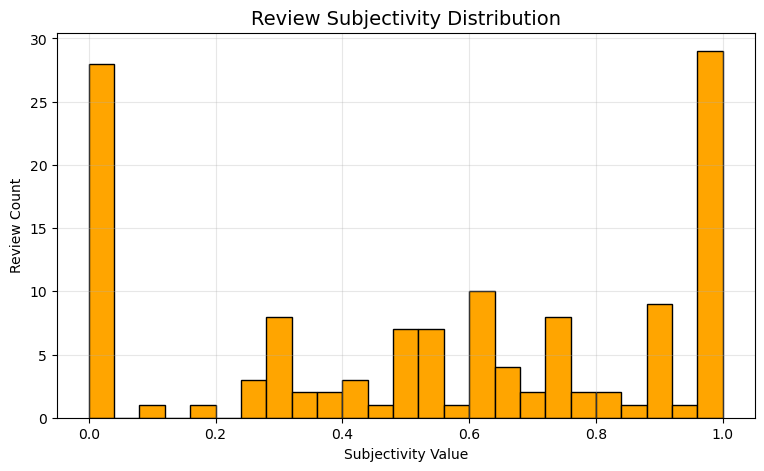

In [149]:
plt.figure(figsize=(9, 5))
plt.hist(review_data['Opinion_Level'], bins=25, color='orange', edgecolor='black')
plt.title("Review Subjectivity Distribution", fontsize=14)
plt.xlabel("Subjectivity Value")
plt.ylabel("Review Count")
plt.grid(alpha=0.3)
plt.show()

## 14. Bar Plot: Sentiment Count

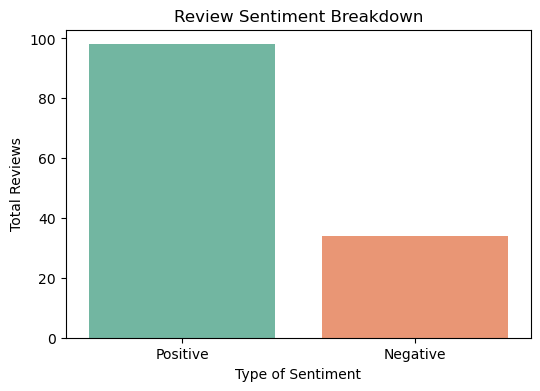

In [152]:
plt.figure(figsize=(6, 4))
sns.countplot(data=review_data, x='Sentiment', palette='Set2')
plt.title("Review Sentiment Breakdown")
plt.xlabel("Type of Sentiment")
plt.ylabel("Total Reviews")
plt.show()

## 15. Sentiment Score Distribution (Histogram + KDE)

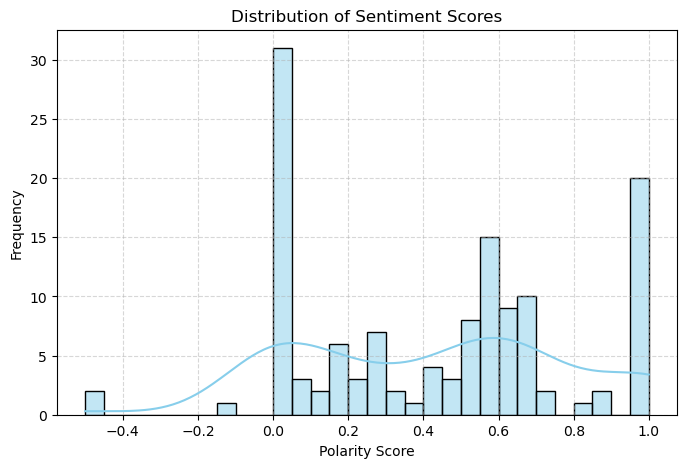

In [155]:
plt.figure(figsize=(8, 5))
sns.histplot(review_data['Sentiment_Score'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 
16. Box Plot: Rating vs Sentiment

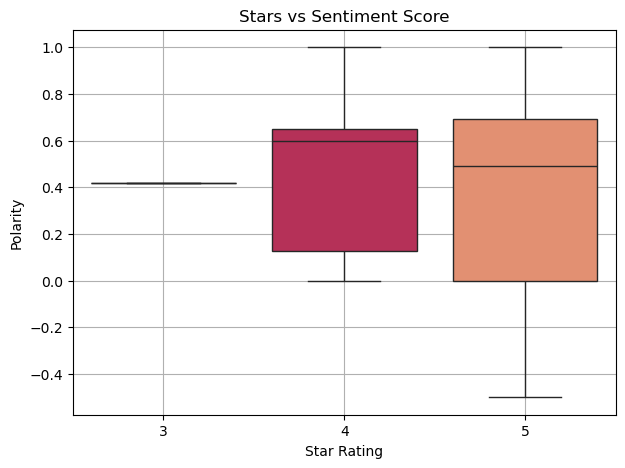

In [158]:
review_data['Stars'] = review_data['Stars'].astype(int)

plt.figure(figsize=(7, 5))
sns.boxplot(data=review_data, x='Stars', y='Sentiment_Score', palette='rocket')
plt.title("Stars vs Sentiment Score")
plt.xlabel("Star Rating")
plt.ylabel("Polarity")
plt.grid(True)
plt.show()

## 17. Sentiment Label Proportion (Pie Chart)

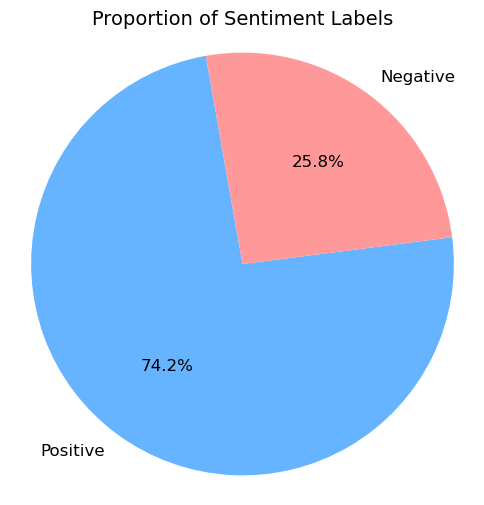

In [161]:
plt.figure(figsize=(6, 6))
sentiment_counts = review_data['Sentiment'].value_counts()
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=100,
    colors=['#66b3ff', '#ff9999'],
    textprops={'fontsize': 12}
)
plt.title("Proportion of Sentiment Labels", fontsize=14)
plt.axis('equal')
plt.show()

## 18. Average Sentiment by Star Rating (Bar Chart)

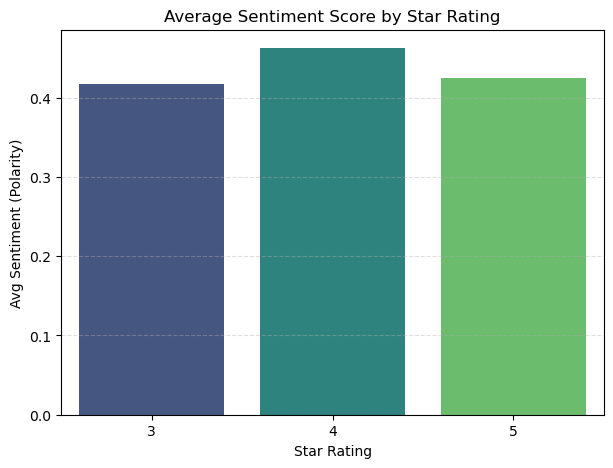

In [164]:
avg_sentiment = review_data.groupby('Stars')['Sentiment_Score'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=avg_sentiment, x='Stars', y='Sentiment_Score', palette='viridis')
plt.title("Average Sentiment Score by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Avg Sentiment (Polarity)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## 19. Subjectivity vs Star Rating (Violin Plot)

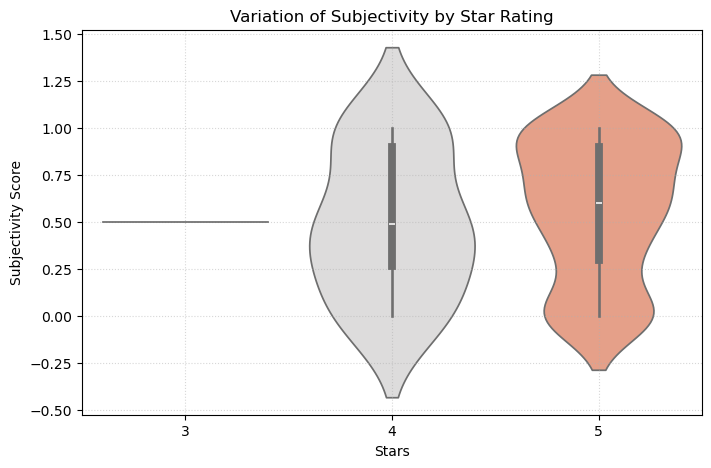

In [167]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=review_data, x='Stars', y='Opinion_Level', palette='coolwarm')
plt.title("Variation of Subjectivity by Star Rating")
plt.xlabel("Stars")
plt.ylabel("Subjectivity Score")
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

## 20. Word Cloud - Positive Reviews

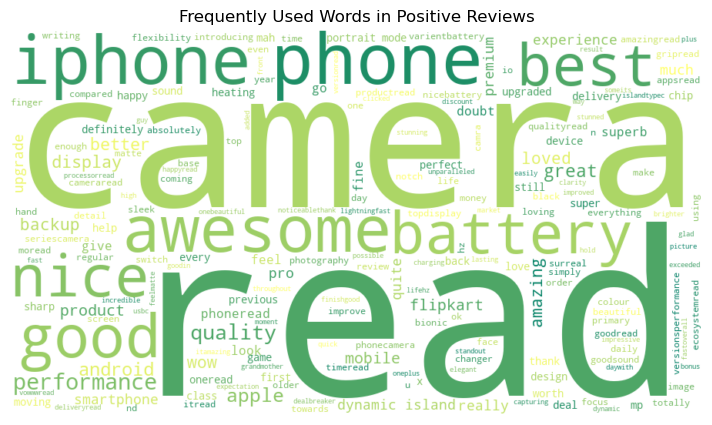

In [173]:
pos_reviews = ' '.join(review_data[review_data['Sentiment'] == 'Positive']['Cleaned_Feedback'])

cloud_pos = WordCloud(width=900, height=500, background_color='white', colormap='summer').generate(pos_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(cloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Frequently Used Words in Positive Reviews")
plt.show()

## 21. Word Cloud - Negative Reviews

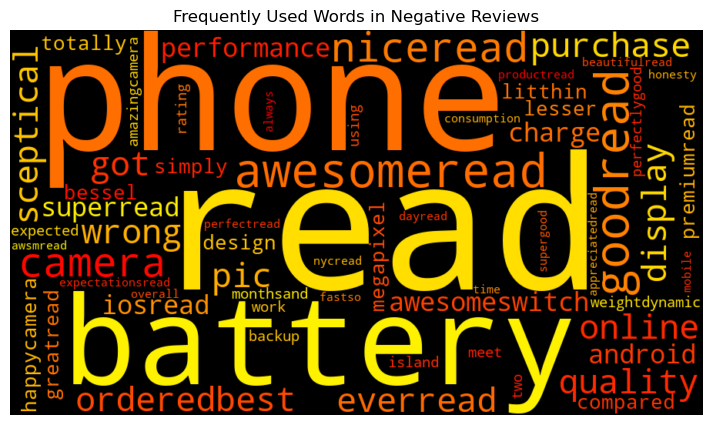

In [176]:
neg_reviews = ' '.join(review_data[review_data['Sentiment'] == 'Negative']['Cleaned_Feedback'])

cloud_neg = WordCloud(width=900, height=500, background_color='black', colormap='autumn').generate(neg_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(cloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Frequently Used Words in Negative Reviews")
plt.show()

## 21. Review Length vs Sentiment

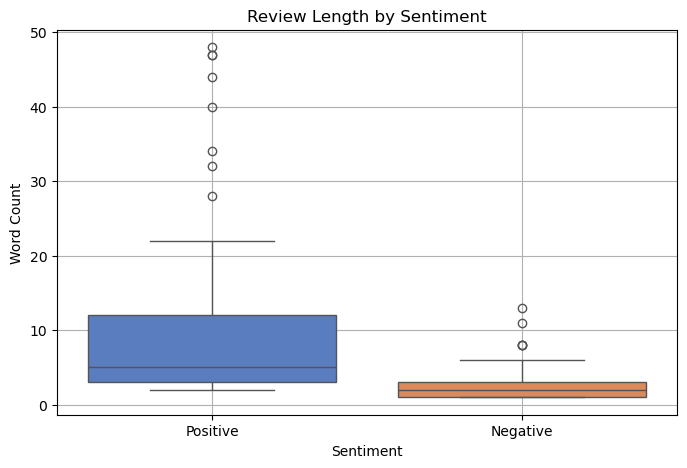

In [179]:
review_data['Word_Count'] = review_data['Cleaned_Feedback'].apply(lambda txt: len(txt.split()))

plt.figure(figsize=(8, 5))
sns.boxplot(data=review_data, x='Sentiment', y='Word_Count', palette='muted')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.grid(True)
plt.show()

## 22. Final DataFrame View

In [182]:
review_data.head(10)

,Customer,Stars,Feedback,Cleaned_Feedback,Sentiment_Score,Opinion_Level,Sentiment,Word_Count
0,bijaya mohanty,5,go itamazing onebeautiful camera super fast pr...,go itamazing onebeautiful camera super fast pr...,0.266667,0.633333,Positive,7
1,Rishabh Jha,5,awesome read,awesome read,1.000000,1.000000,Positive,2
2,Ajin V,5,high quality cameraread,high quality cameraread,0.160000,0.540000,Positive,3
3,Mousam Guha Roy,4,niceread,niceread,0.000000,0.000000,Negative,1
4,Prithivi Boruah,5,camera quality improved loving itread,camera quality improved loving itread,0.600000,0.950000,Positive,5
5,Nikhil Kumar,5,switch oneplus iphone stunned camera performan...,switch oneplus iphone stunned camera performan...,1.000000,1.000000,Positive,10
6,Flipkart Customer,5,awesome photography experience battery backup ...,awesome photography experience battery backup ...,0.733333,0.700000,Positive,10
7,Akshay Meena,5,beautiful elegant vowwwread,beautiful elegant vowwwread,0.675000,1.000000,Positive,3
8,Arunji Govindaraju,5,awesome product happy hold better hand feelmat...,awesome product happy hold better hand feelmat...,0.579167,0.552083,Positive,28
9,Sheetla Prasad Maurya,4,best mobile phonecamera quality nicebattery ba...,best mobile phonecamera quality nicebattery ba...,1.000000,0.300000,Positive,9


## 23. Save Final Cleaned Data

In [187]:
review_data.to_csv("Flipkart_IPhone15_Reviews_Cleaned.csv", index=False)
print("File saved as 'Flipkart_IPhone15_Reviews_Cleaned.csv'")

File saved as 'Flipkart_IPhone15_Reviews_Cleaned.csv'
